<a href="https://colab.research.google.com/github/AtfastrSlushyMaker/pl-standings-prediction-project/blob/main/notebooks/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# --- PREMIER LEAGUE - MODELING PHASE ---
# This notebook uses the processed dataset to train and evaluate ML models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed dataset created in data_preparation.ipynb
df = pd.read_csv('processed_premier_league_combined.csv')

print("✅ Dataset successfully loaded!")
print("Shape:", df.shape)
df.head()


✅ Dataset successfully loaded!
Shape: (9500, 23)


,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,...,HC,AC,HY,AY,HR,AR,FTR_encoded,Season_encoded,HomeTeam_le,AwayTeam_le
0,2000-01,2000-08-19,Charlton,Man City,4,0,H,17.0,8.0,14.0,...,6.0,6.0,1.0,2.0,0.0,0.0,2,0,12,26
1,2000-01,2000-08-19,Chelsea,West Ham,4,2,H,17.0,12.0,10.0,...,7.0,7.0,1.0,2.0,0.0,0.0,2,0,13,43
2,2000-01,2000-08-19,Coventry,Middlesbrough,1,3,A,6.0,16.0,3.0,...,8.0,4.0,5.0,3.0,1.0,0.0,0,0,14,28
3,2000-01,2000-08-19,Derby,Southampton,2,2,D,6.0,13.0,4.0,...,5.0,8.0,1.0,1.0,0.0,0.0,1,0,16,36
4,2000-01,2000-08-19,Leeds,Everton,2,0,H,17.0,12.0,8.0,...,6.0,4.0,1.0,3.0,0.0,0.0,2,0,22,17


 Model Evaluation:
Accuracy: 0.8647368421052631

Classification Report:
               precision    recall  f1-score   support

    Away Win       0.97      0.82      0.89       558
        Draw       0.72      0.79      0.75       497
    Home Win       0.90      0.94      0.92       845

    accuracy                           0.86      1900
   macro avg       0.86      0.85      0.85      1900
weighted avg       0.87      0.86      0.87      1900



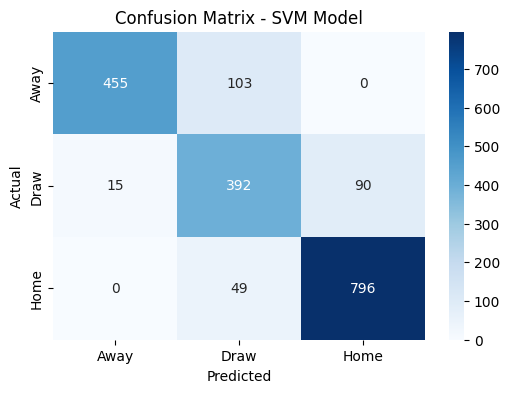

In [7]:
# This section validates that the dataset is ready for ML tasks
# and applies a simple SVM model to predict match results (FTR_encoded).

#1.  Define features (X) and target (y)
# We exclude non-predictive columns like Date or text labels
X = df.drop(columns=['FTR', 'FTR_encoded', 'Date', 'Season', 'HomeTeam', 'AwayTeam'])
y = df['FTR_encoded']

#2. Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = svm_model.predict(X_test)

# 5. Evaluate performance
print(" Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Away Win','Draw','Home Win']))

# 6. Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=['Away','Draw','Home'], yticklabels=['Away','Draw','Home'])
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
